In [31]:
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
from math import *
from matplotlib import pyplot as plt
from ahm import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## load data

In [2]:
item_attribute = pd.read_csv('data/item_attribute.csv', header=None)
# Qmat = pd.read_excel('data/Qmatrix_koh.xlsx', header=None).drop(columns=[7,8])
# Qmat.to_csv('data/item_attribute.csv', index=None, header=None)
item_attribute = np.array(item_attribute)
item_attribute

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 1, 0, 1],
       [1, 1, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0],
       [1, 1, 1, 0, 1, 1, 0]])

In [3]:
real_response = np.array(pd.read_csv('data/response.csv').drop(columns=['ID','area','sex','total']))
# real_response = np.array(pd.read_excel('data/Qdata.xlsx').drop(columns=['ID','area','sex','total']))

In [4]:
# convert to csv
# real_response = pd.read_excel('data/Qdata.xlsx')
# real_response.to_csv('data/response.csv', index=None)

------------------------------------------------------------

In [5]:
attribute_num = 7

In [6]:
graph = Graph(attribute_num)

In [7]:
graph.add_edge(0,1)
graph.add_edge(0,2)
graph.add_edge(0,4)
graph.add_edge(1,3)
graph.add_edge(1,5)
graph.add_edge(2,3)
graph.add_edge(2,6)

In [8]:
A = np.array(graph.adjacency_matrix)
print(A)

[[0 1 1 0 1 0 0]
 [0 0 0 1 0 1 0]
 [0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [9]:
R = calc_reachability(A)
print(R)

[[1 1 1 1 1 1 1]
 [0 1 0 1 0 1 0]
 [0 0 1 1 0 0 1]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]


In [10]:
# Q = calc_Q(R, False)
# print(Q.shape)
# Qr = calc_Q(R, True)
# print(Qr.shape)

In [34]:
S = calc_knowledge_states(A)
print(S.shape)
print(S)

(27, 7)
[[0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 1 0 0]
 [1 0 1 0 0 0 0]
 [1 0 1 0 0 0 1]
 [1 0 1 0 1 0 0]
 [1 0 1 0 1 0 1]
 [1 1 0 0 0 0 0]
 [1 1 0 0 0 1 0]
 [1 1 0 0 1 0 0]
 [1 1 0 0 1 1 0]
 [1 1 1 0 0 0 0]
 [1 1 1 0 0 0 1]
 [1 1 1 0 0 1 0]
 [1 1 1 0 0 1 1]
 [1 1 1 0 1 0 0]
 [1 1 1 0 1 0 1]
 [1 1 1 0 1 1 0]
 [1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0]
 [1 1 1 1 0 0 1]
 [1 1 1 1 0 1 0]
 [1 1 1 1 0 1 1]
 [1 1 1 1 1 0 0]
 [1 1 1 1 1 0 1]
 [1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]]


In [11]:
Q = calc_Q(R)
print(Q.shape)
print(Q)

(26, 7)
[[1 0 0 0 0 0 0]
 [1 0 0 0 1 0 0]
 [1 0 1 0 0 0 0]
 [1 0 1 0 0 0 1]
 [1 0 1 0 1 0 0]
 [1 0 1 0 1 0 1]
 [1 1 0 0 0 0 0]
 [1 1 0 0 0 1 0]
 [1 1 0 0 1 0 0]
 [1 1 0 0 1 1 0]
 [1 1 1 0 0 0 0]
 [1 1 1 0 0 0 1]
 [1 1 1 0 0 1 0]
 [1 1 1 0 0 1 1]
 [1 1 1 0 1 0 0]
 [1 1 1 0 1 0 1]
 [1 1 1 0 1 1 0]
 [1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0]
 [1 1 1 1 0 0 1]
 [1 1 1 1 0 1 0]
 [1 1 1 1 0 1 1]
 [1 1 1 1 1 0 0]
 [1 1 1 1 1 0 1]
 [1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]]


## calc ideal responses

In [45]:
ideal_responses = calc_ideal_responses(Q, S)
len(ideal_responses), Q.shape

(27, (26, 7))

## calc distances to idr

In [51]:
all_hamming_dists = list()

for item in range(Q.shape[0]):
    all_hamming_dists.append(calc_hamming_dist(item_attribute, Q[item]))
all_hamming_dists[0]

[0,
 2,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 2,
 3,
 4,
 3,
 3,
 1,
 4,
 3,
 5,
 4,
 2,
 2,
 4,
 2,
 3,
 1,
 2,
 5,
 2,
 2,
 4]

-----------------------------------------------------------

In [64]:
len(real_response), len(ideal_responses)

(977, 27)

In [52]:
iteration = 1500

In [53]:
cost = calc_cost(real_response, ideal_responses, Q, get_index(Q, all_hamming_dists, iteration), iteration)

100%|██████████| 1500/1500 [05:56<00:00,  4.20it/s]


In [59]:
cum_std = [np.std(cost[:i]) for i in tqdm(range(1, iteration + 1))]
cum_mean = [np.mean(cost[:i]) for i in tqdm(range(1, iteration + 1))]

100%|██████████| 1500/1500 [00:00<00:00, 27767.04it/s]


In [60]:
cum_mean[-1]

0.1929968506416818

In [66]:
np.array(real_response).shape, np.array(ideal_responses).shape

((977, 30), (27, 26))

In [67]:
Q.shape

(26, 7)

In [69]:
S.shape

(27, 7)

## visualization

In [119]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(ideal_responses)

[t-SNE] Computing 26 nearest neighbors...
[t-SNE] Indexed 27 samples in 0.000s...
[t-SNE] Computed neighbors for 27 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 27 / 27
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.941689
[t-SNE] KL divergence after 300 iterations: 0.635311


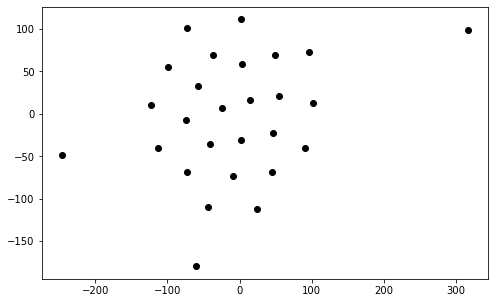

In [129]:
plt.figure(figsize=(8,5))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c='k')
# plt.scatter(tsne_results[0,0], tsne_results[0,1], c='k')
# plt.scatter(tsne_results[-1,0], tsne_results[-1,1], c='r')

plt.savefig("idr.pdf", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=0)

In [89]:
mapping_index = get_index(Q, all_hamming_dists, 1)
mapping_index.shape

(26, 1)

In [85]:
response = real_response

In [90]:
mapping_response_data = np.zeros((response.shape[0], Q.shape[0]))

for j in range(Q.shape[0]):
    mapping_response_data[:, j] = response[:, int(mapping_index[:, 0][j])]

In [91]:
mapping_response_data.shape

(977, 26)

In [115]:
data = np.row_stack([mapping_response_data[::4], ideal_responses])

In [116]:
tsne_results = tsne.fit_transform(data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 272 samples in 0.000s...
[t-SNE] Computed neighbors for 272 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 272 / 272
[t-SNE] Mean sigma: 1.114252
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.608963
[t-SNE] KL divergence after 300 iterations: 0.308971


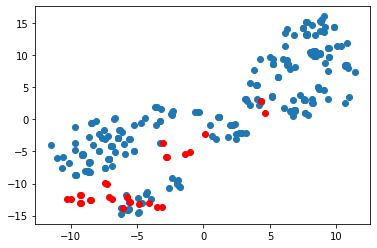

In [117]:
num_responses = mapping_response_data[::4].shape[0]
plt.scatter(tsne_results[:num_responses,0], tsne_results[:num_responses,1])
plt.scatter(tsne_results[num_responses:,0], tsne_results[num_responses:,1], c='r')